# 0. Install and Import Dependencies

In [1]:
!pip install mediapipe opencv-python pandas scikit-learn

In [2]:
import mediapipe as mp 
import cv2 
import requests
import numpy as np
import csv
import os

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [4]:
pip install mediapipe --upgrade

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mediapipe as mp
print(mp.__version__)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


0.10.10


# 1. เทสกล้องทำการตรวจจับ

In [ ]:
# cap = cv2.VideoCapture(0)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image.flags.writeable = False        
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
#         # 1. Draw face landmarks
#         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,  
#                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                                  )
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
                        
#         cv2.imshow('Raw Webcam Feed', image)

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

In [ ]:
# import mediapipe as mp
# import cv2

# # 1. Create variables for Hand model
# mp_hands = mp.solutions.hands

# # 2. Create variables for Pose model
# mp_pose = mp.solutions.pose

# # 3. Create variables for Face Detection model
# mp_face_detection = mp.solutions.face_detection

# # 4. Create variables for drawing landmarks
# mp_drawing = mp.solutions.drawing_utils

# # Create variables to store left hand and right hand landmarks
# left_hand_landmarks = None
# right_hand_landmarks = None

# # 5. Call the Hand model
# with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:

#     # 6. Call the Pose model
#     with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
#         # 7. Call the Face Detection model
#         with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
        
#             # 8. Open the camera
#             cap = cv2.VideoCapture(0)

#             while cap.isOpened():
#                 ret, frame = cap.read()

#                 # 9. Recolor Feed
#                 image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#                 image.flags.writeable = False

#                 # 10. Make Detections for Pose
#                 results_pose = pose.process(image)

#                 # 11. Make Detections for Hands
#                 results_hands = hands.process(image)

#                 # 12. Make Detections for Face Detection
#                 results_face_detection = face_detection.process(image)

#                 # 13. Recolor image back to BGR for rendering
#                 image.flags.writeable = True
#                 image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#                 # 14. Draw Pose landmarks
#                 mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                          mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                          mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                          )

#                 # 15. Draw Hand landmarks
#                 if results_hands.multi_hand_landmarks:
#                     for hand_landmarks in results_hands.multi_hand_landmarks:
#                         # Check if it's left hand or right hand
#                         if hand_landmarks == results_hands.multi_hand_landmarks[0]:
#                             # Left Hand
#                             left_hand_landmarks = hand_landmarks
#                             mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                      mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                                      mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                                      )
#                         elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
#                             # Right Hand
#                             right_hand_landmarks = hand_landmarks
#                             mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                      mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                                      mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                                      )

#                 # 16. Draw Face Detection results
#                 if results_face_detection.detections:
#                     for detection in results_face_detection.detections:
#                         mp_drawing.draw_detection(image, detection)

#                 # 17. Show image
#                 cv2.imshow('Raw Webcam Feed', image)

#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break

#             cap.release()
#             cv2.destroyAllWindows()


# โค้ดที่เราจะใช้งานจริง

In [6]:
import mediapipe as mp
import cv2
import numpy as np

# สร้างตัวแปรสำหรับโมดูล Hand
mp_hands = mp.solutions.hands

# สร้างตัวแปรสำหรับโมดูล Pose
mp_pose = mp.solutions.pose

# สร้างตัวแปรสำหรับโมดูล Face Detection
mp_face_detection = mp.solutions.face_detection

# สร้างตัวแปรสำหรับโมดูล Face Mesh
mp_face_mesh = mp.solutions.face_mesh

# สร้างตัวแปรสำหรับการวาดลักษณะต่าง ๆ
mp_drawing = mp.solutions.drawing_utils

# สร้างตัวแปรเพื่อเก็บ landmarks ของมือซ้ายและมือขวา
left_hand_landmarks = None
right_hand_landmarks = None

# เรียกใช้โมดูล Hand
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:

    # เรียกใช้โมดูล Pose
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
        # เรียกใช้โมดูล Face Detection
        with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
        
            # เรียกใช้โมดูล Face Mesh
            with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
        
                # เปิดกล้อง
                cap = cv2.VideoCapture(0)  # ใช้ 0 สำหรับกล้องดีฟอลต์ หรือใส่หมายเลขกล้องตามที่เครื่องได้ติดตั้ง

                while cap.isOpened():
                    ret, frame = cap.read()

                    # เปลี่ยนสีของภาพ
                    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    image.flags.writeable = False

                    # ทำการตรวจจับ Pose
                    results_pose = pose.process(image)

                    # ทำการตรวจจับ Hands
                    results_hands = hands.process(image)

                    # ทำการตรวจจับ Face Detection
                    results_face_detection = face_detection.process(image)

                    # ทำการตรวจจับ Face Mesh
                    results_face_mesh = face_mesh.process(image)

                    # เปลี่ยนสีของภาพกลับเป็น BGR เพื่อแสดงผล
                    image.flags.writeable = True
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                    # วาดลักษณะของ Pose
                    mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                             )

                    # วาดลักษณะของ Hands
                    if results_hands.multi_hand_landmarks:
                        for hand_landmarks in results_hands.multi_hand_landmarks:
                            # ตรวจสอบว่าเป็นมือซ้ายหรือมือขวา
                            if hand_landmarks == results_hands.multi_hand_landmarks[0]:
                                # มือซ้าย
                                left_hand_landmarks = hand_landmarks
                                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                                         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                                         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                                         )
                            elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
                                # มือขวา
                                right_hand_landmarks = hand_landmarks
                                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                                         mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                                         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                                         )

                    # วาดผลลัพธ์จาก Face Detection
                    if results_face_detection.detections:
                        for detection in results_face_detection.detections:
                            mp_drawing.draw_detection(image, detection)

                    # วาดลักษณะของ Face Mesh
                    if results_face_mesh.multi_face_landmarks:
                        for face_landmarks in results_face_mesh.multi_face_landmarks:
                            mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                                     mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                                     mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                                     )

                    # แสดงภาพ
                    cv2.imshow('Raw Webcam Feed', image)

                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

                cap.release()
                cv2.destroyAllWindows()


แสดงจุดบนมือเพื่อดูค่า Z

In [ ]:
# import mediapipe as mp
# import cv2

# # สร้างตัวแปรสำหรับโมดูล Hand
# mp_hands = mp.solutions.hands

# # สร้างตัวแปรสำหรับโมดูล Pose
# mp_pose = mp.solutions.pose

# # สร้างตัวแปรสำหรับโมดูล Face Detection
# mp_face_detection = mp.solutions.face_detection

# # สร้างตัวแปรสำหรับโมดูล Face Mesh
# mp_face_mesh = mp.solutions.face_mesh

# # สร้างตัวแปรสำหรับการวาดลักษณะต่าง ๆ
# mp_drawing = mp.solutions.drawing_utils

# # สร้างตัวแปรเพื่อเก็บ landmarks ของมือซ้ายและมือขวา
# left_hand_landmarks = None
# right_hand_landmarks = None

# # เรียกใช้โมดูล Hand
# with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:

#     # เรียกใช้โมดูล Pose
#     with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
#         # เรียกใช้โมดูล Face Detection
#         with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
        
#             # เรียกใช้โมดูล Face Mesh
#             with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
        
#                 # เปิดกล้อง
#                 cap = cv2.VideoCapture(0)  # ใช้ 0 สำหรับกล้องดีฟอลต์ หรือใส่หมายเลขกล้องตามที่เครื่องได้ติดตั้ง

#                 while cap.isOpened():
#                     ret, frame = cap.read()

#                     # เปลี่ยนสีของภาพ
#                     image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#                     image.flags.writeable = False

#                     # ทำการตรวจจับ Pose
#                     results_pose = pose.process(image)

#                     # ทำการตรวจจับ Hands
#                     results_hands = hands.process(image)

#                     # ทำการตรวจจับ Face Detection
#                     results_face_detection = face_detection.process(image)

#                     # ทำการตรวจจับ Face Mesh
#                     results_face_mesh = face_mesh.process(image)

#                     # เปลี่ยนสีของภาพกลับเป็น BGR เพื่อแสดงผล
#                     image.flags.writeable = True
#                     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#                     # วาดลักษณะของ Pose
#                     mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                              )

#                     # วาดลักษณะของ Hands
#                     if results_hands.multi_hand_landmarks:
#                         for hand_landmarks in results_hands.multi_hand_landmarks:
#                             # ตรวจสอบว่าเป็นมือซ้ายหรือมือขวา
#                             if hand_landmarks == results_hands.multi_hand_landmarks[0]:
#                                 # มือซ้าย
#                                 left_hand_landmarks = hand_landmarks

#                                 # ดึงตำแหน่ง landmark ที่ 0, 4, และ 20 ของมือซ้าย
#                                 left_thumb = (
#                                     left_hand_landmarks.landmark[0].x,
#                                     left_hand_landmarks.landmark[0].y,
#                                     left_hand_landmarks.landmark[0].z
#                                 )
#                                 left_index_finger = (
#                                     left_hand_landmarks.landmark[4].x,
#                                     left_hand_landmarks.landmark[4].y,
#                                     left_hand_landmarks.landmark[4].z
#                                 )
#                                 left_twenty_finger = (
#                                     left_hand_landmarks.landmark[20].x,
#                                     left_hand_landmarks.landmark[20].y,
#                                     left_hand_landmarks.landmark[20].z
#                                 )

#                                 # พิมพ์ค่า landmark ที่ 0, 4, และ 20 ของมือซ้าย
#                                 print("Left Hand - Thumb:", left_thumb)
#                                 print("Left Hand - Index Finger:", left_index_finger)
#                                 print("Left Hand - Twentieth Finger:", left_twenty_finger)

#                                 mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                                          )
#                             elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
#                                 # มือขวา
#                                 right_hand_landmarks = hand_landmarks

#                                 # ดึงตำแหน่ง landmark ที่ 0, 4, และ 20 ของมือขวา
#                                 right_thumb = (
#                                     right_hand_landmarks.landmark[0].x,
#                                     right_hand_landmarks.landmark[0].y,
#                                     right_hand_landmarks.landmark[0].z
#                                 )
#                                 right_index_finger = (
#                                     right_hand_landmarks.landmark[4].x,
#                                     right_hand_landmarks.landmark[4].y,
#                                     right_hand_landmarks.landmark[4].z
#                                 )
#                                 right_twenty_finger = (
#                                     right_hand_landmarks.landmark[20].x,
#                                     right_hand_landmarks.landmark[20].y,
#                                     right_hand_landmarks.landmark[20].z
#                                 )

#                                 # พิมพ์ค่า landmark ที่ 0, 4, และ 20 ของมือขวา
#                                 print("Right Hand - Thumb:", right_thumb)
#                                 print("Right Hand - Index Finger:", right_index_finger)
#                                 print("Right Hand - Twentieth Finger:", right_twenty_finger)

#                                 mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                          mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                                          mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                                          )

#                     # วาดผลลัพธ์จาก Face Detection
#                     if results_face_detection.detections:
#                         for detection in results_face_detection.detections:
#                             mp_drawing.draw_detection(image, detection)

#                     # วาดลักษณะของ Face Mesh
#                     if results_face_mesh.multi_face_landmarks:
#                         for face_landmarks in results_face_mesh.multi_face_landmarks:
#                             mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
#                                                      mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                                                      mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                                                      )

#                     # แสดงภาพ
#                     cv2.imshow('Raw Webcam Feed', image)

#                     if cv2.waitKey(10) & 0xFF == ord('q'):
#                         break

#                 cap.release()
#                 cv2.destroyAllWindows()


In [ ]:
# results
hand_landmarks

In [ ]:
left_hand_landmarks

In [ ]:
right_hand_landmarks

# 2. จับภาพ Landmarks & ส่งออกไปยัง CSV
<!--<img src="https://i.imgur.com/8bForKY.png">-->
<!--<img src="https://i.imgur.com/AzKNp7A.png">-->

In [ ]:
import csv
import os
import numpy as np

In [ ]:
# num_coords = len(results.pose_landmarks.landmark)+len(results.right_hand_landmarks.landmark)+len(results.left_hand_landmarks.landmark)
# num_coords

In [ ]:
# สร้างตัวแปรเพื่อเก็บจำนวน landmark ทั้งหมด
num_coords = 0

# นับ landmark จากโมดูล Pose
# if results_pose.pose_landmarks:
#     num_coords += len(results_pose.pose_landmarks.landmark)

# # นับ landmark จากโมดูล Face Mesh
# if results_face_mesh.multi_face_landmarks:
#     for face_landmarks in results_face_mesh.multi_face_landmarks:
#         num_coords += len(face_landmarks.landmark)

# นับ landmark จากมือซ้าย
if left_hand_landmarks:
    num_coords += len(left_hand_landmarks.landmark)

# นับ landmark จากมือขวา
if right_hand_landmarks:
    num_coords += len(right_hand_landmarks.landmark)

# แสดงผลจำนวน landmark ทั้งหมด
print(f"Total coordinates detected: {num_coords}")

In [ ]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]
    
    # โดย 'xn', 'yn', 'zn', 'vn' จะแทนตำแหน่ง x, y, z, และ visibility ของ landmark ที่ n บนแต่ละส่วนของร่างกายหรือใบหน้าที่ตรวจจับได้

In [ ]:
landmarks

In [ ]:
# สร้างไฟล์ 'csv' สำหรับเก็บข้อมูล landmark ในรูปแบบ CSV
with open('Thai_Sign_Language_Term2.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [ ]:
class_name = "s.o.s"

In [ ]:
# import mediapipe as mp  # 1. เรียกใช้งานไลบรารี Mediapipe
# import cv2            # 2. เรียกใช้งาน OpenCV สำหรับประมวลผลภาพ
# import csv            # 3. เรียกใช้งาน CSV เพื่อบันทึกข้อมูล
# import numpy as np    # 4. เรียกใช้งาน NumPy สำหรับการจัดการข้อมูลตัวเลข
# import pandas as pd

# # 5. สร้างตัวแปรสำหรับโมดูลต่าง ๆ ของ Mediapipe
# mp_hands = mp.solutions.hands          # โมดูลตรวจจับมือ
# mp_pose = mp.solutions.pose            # โมดูลตรวจจับลักษณะท่าทางของร่างกาย
# mp_face_detection = mp.solutions.face_detection  # โมดูลตรวจจับใบหน้า
# mp_face_mesh = mp.solutions.face_mesh  # โมดูลตรวจจับลักษณะใบหน้าแบบ Mesh
# mp_drawing = mp.solutions.drawing_utils  # โมดูลสำหรับวาดแต้มบนภาพ

# # สร้างตัวแปรเพื่อเก็บ landmarks ของมือซ้ายและมือขวา
# left_hand_landmarks = None
# right_hand_landmarks = None

# # 6. เริ่มใช้งานโมดูลตรวจจับมือ
# with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:

#     # 7. เริ่มใช้งานโมดูลตรวจจับลักษณะท่าทางของร่างกาย
#     with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

#         # 8. เริ่มใช้งานโมดูลตรวจจับใบหน้า
#         with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:

#             # 9. เริ่มใช้งานโมดูลตรวจจับลักษณะใบหน้าแบบ Mesh
#             with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:

#                 # 10. เปิดกล้อง
#                 cap = cv2.VideoCapture(0)

#                 while cap.isOpened():
#                     ret, frame = cap.read()

#                     # 11. เปลี่ยนรูปแบบสีของภาพเป็น RGB
#                     image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#                     image.flags.writeable = False  # ทำให้รูปภาพเป็นแบบอ่านอย่างเดียวเพื่อเพิ่มประสิทธิภาพ

#                     # 12. ทำการตรวจจับ Pose ในภาพ
#                     results_pose = pose.process(image)

#                     # 13. ทำการตรวจจับ Hands ในภาพ
#                     results_hands = hands.process(image)

#                     # 14. ทำการตรวจจับ Face Detection ในภาพ
#                     results_face_detection = face_detection.process(image)

#                     # 15. ทำการตรวจจับ Face Mesh ในภาพ
#                     results_face_mesh = face_mesh.process(image)

#                     # 16. กลับสีของภาพเป็น BGR เพื่อนำไปแสดงผล
#                     image.flags.writeable = True
#                     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#                     # 17. วาด landmarks ของ Pose บนภาพ
#                     mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                              )

#                     # 18. วาด landmarks ของ Hands บนภาพ
#                     if results_hands.multi_hand_landmarks:
#                         for hand_landmarks in results_hands.multi_hand_landmarks:
#                             # ตรวจสอบว่าเป็นมือซ้ายหรือมือขวา
#                             if hand_landmarks == results_hands.multi_hand_landmarks[0]:
#                                 # มือซ้าย
#                                 left_hand_landmarks = hand_landmarks
#                                 mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                                          )
#                             elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
#                                 # มือขวา
#                                 right_hand_landmarks = hand_landmarks
#                                 mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                          mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                                          mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                                          )

#                     # 19. วาดผลการตรวจจับ Face Detection บนภาพ
#                     if results_face_detection.detections:
#                         for detection in results_face_detection.detections:
#                             mp_drawing.draw_detection(image, detection)

#                     # 20. วาด landmarks ของ Face Mesh บนภาพ
#                     #if results_face_mesh.multi_face_landmarks:
#                         #for face_landmarks in results_face_mesh.multi_face_landmarks:
#                             #mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
#                                                      #mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                                                      #mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                                                      #)

#                     # 21. แสดงภาพ

#                                         # ส่วนการส่งออกข้อมูล
#                     try:
#                         # ดึง landmarks ของ Pose
#                         pose_landmarks = results_pose.pose_landmarks
#                         if pose_landmarks:
#                             pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks.landmark]).flatten())
#                         else:
#                             pose_row = []

#                         # ดึง landmarks ของใบหน้า
#                         #face_landmarks = results_face_mesh.multi_face_landmarks[0] if results_face_mesh.multi_face_landmarks else None
#                         #if face_landmarks:
#                             #face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face_landmarks.landmark]).flatten())
#                         #else:
#                             #face_row = []

#                         # ดึง landmarks ของมือซ้าย
#                         left_hand_landmarks = results_hands.multi_hand_landmarks[0] if results_hands.multi_hand_landmarks else None
#                         if left_hand_landmarks:
#                             left_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand_landmarks.landmark]).flatten())
#                         else:
#                             left_hand_row = []

#                         # ดึง landmarks ของมือขวา
#                         right_hand_landmarks = results_hands.multi_hand_landmarks[1] if len(results_hands.multi_hand_landmarks) > 1 else None
#                         if right_hand_landmarks:
#                             right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks.landmark]).flatten())
#                         else:
#                             right_hand_row = []

#                         # รวมข้อมูล
#                         row = pose_row + left_hand_row + right_hand_row # + face_row 

#                         # เพิ่มชื่อคลาสลงไป
#                         row.insert(0, class_name)

#                         # ส่งออกข้อมูลไปยังไฟล์ CSV
#                         with open('coords_real5.csv', mode='a', newline='') as f:
#                             csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                             csv_writer.writerow(row)
#                     except:
#                         pass

#                     cv2.imshow('Raw Webcam Feed', image)

#                     if cv2.waitKey(10) & 0xFF == ord('q'):
#                         break

#                 cap.release()
#                 cv2.destroyAllWindows()


In [ ]:
# import mediapipe as mp
# import cv2
# import csv
# import numpy as np
# import time

# # กำหนดชื่อคลาส
# class_name = "thank"

# # กำหนดเวลาที่นับถอยหลัง (วินาที)
# countdown = 7

# # แสดงข้อความเริ่มต้น
# print(f"Recording as '{class_name}' in {countdown} seconds. Press 'q' to stop...")

# # กำหนดโมดูลของ Mediapipe
# mp_hands = mp.solutions.hands
# mp_pose = mp.solutions.pose
# mp_face_detection = mp.solutions.face_detection
# mp_face_mesh = mp.solutions.face_mesh
# mp_drawing = mp.solutions.drawing_utils

# # สร้างตัวแปรสำหรับ landmarks ของมือ
# left_hand_landmarks = None
# right_hand_landmarks = None

# # นับถอยหลัง
# for i in range(countdown, 0, -1):
#     print(i)
#     time.sleep(1)

# # เริ่มการทำงานของโมดูลตรวจจับมือ
# with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:
#     # เริ่มการทำงานของโมดูลตรวจจับลักษณะท่าทางของร่างกาย
#     with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
#         # เริ่มการทำงานของโมดูลตรวจจับใบหน้า
#         with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
#             # เริ่มการทำงานของโมดูลตรวจจับลักษณะใบหน้าแบบ Mesh
#             with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
#                 # เปิดกล้อง
#                 cap = cv2.VideoCapture(0)

#                 start_time = time.time()

#                 # เริ่มลูปสำหรับบันทึก
#                 while cap.isOpened():
#                     ret, frame = cap.read()

#                     # แสดงชื่อคลาสที่กำลังบันทึก
#                     cv2.putText(frame, class_name, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)

#                     # คำนวณเวลาที่ผ่านไป
#                     elapsed_time = time.time() - start_time

#                     # แสดงเวลาที่ผ่านไป
#                     cv2.putText(frame, f"Time: {int(elapsed_time)} seconds", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

#                     # เปลี่ยนรูปแบบสีของภาพเป็น RGB
#                     image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#                     image.flags.writeable = False

#                     # ตรวจจับ Pose ในภาพ
#                     results_pose = pose.process(image)

#                     # ตรวจจับ Hands ในภาพ
#                     results_hands = hands.process(image)

#                     # ตรวจจับ Face Detection ในภาพ
#                     results_face_detection = face_detection.process(image)

#                     # ตรวจจับ Face Mesh ในภาพ
#                     results_face_mesh = face_mesh.process(image)

#                     # กลับสีของภาพเป็น BGR เพื่อนำไปแสดงผล
#                     image.flags.writeable = True
#                     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#                     # วาด landmarks ของ Pose บนภาพ
#                     mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                              )

#                     # วาด landmarks ของ Hands บนภาพ
#                     if results_hands.multi_hand_landmarks:
#                         for hand_landmarks in results_hands.multi_hand_landmarks:
#                             # ตรวจสอบว่าเป็นมือซ้ายหรือมือขวา
#                             if hand_landmarks == results_hands.multi_hand_landmarks[0]:
#                                 # มือซ้าย
#                                 left_hand_landmarks = hand_landmarks
#                                 mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                                          )
#                             elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
#                                 # มือขวา
#                                 right_hand_landmarks = hand_landmarks
#                                 mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
#                                                          mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                                          mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                                          )

#                     # วาดผลการตรวจจับ Face Detection บนภาพ
#                     if results_face_detection.detections:
#                         for detection in results_face_detection.detections:
#                             mp_drawing.draw_detection(image, detection)

#                     # ตรวจเวลาถ้าหากเกิน 45 วินาทีให้หยุด
#                     if elapsed_time >= 45:
#                         break

#                     try:
#                         # ดึง landmarks ของ Pose
#                         pose_landmarks = results_pose.pose_landmarks
#                         if pose_landmarks:
#                             pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks.landmark]).flatten())
#                         else:
#                             pose_row = []

#                         # ดึง landmarks ของมือซ้าย
#                         left_hand_landmarks = results_hands.multi_hand_landmarks[0] if results_hands.multi_hand_landmarks else None
#                         if left_hand_landmarks:
#                             left_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand_landmarks.landmark]).flatten())
#                         else:
#                             left_hand_row = []

#                         # ดึง landmarks ของมือขวา
#                         right_hand_landmarks = results_hands.multi_hand_landmarks[1] if len(results_hands.multi_hand_landmarks) > 1 else None
#                         if right_hand_landmarks:
#                             right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks.landmark]).flatten())
#                         else:
#                             right_hand_row = []

#                         # รวมข้อมูล landmarks ทั้งหมดในแถวเดียว
#                         row = pose_row + left_hand_row + right_hand_row

#                         # เพิ่มชื่อคลาสลงไปด้านหน้าของแถว
#                         row.insert(0, class_name)

#                         # เขียนข้อมูลลงในไฟล์ CSV
#                         with open('coords_next.csv', mode='a', newline='') as f:
#                             csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                             csv_writer.writerow(row)
#                     except:
#                         pass

#                     # แสดงภาพจากกล้อง
#                     cv2.imshow('Raw Webcam Feed', image)

#                     # ถ้ากด 'q' ในหน้าต่างภาพให้หยุดการทำงาน
#                     if cv2.waitKey(10) & 0xFF == ord('q'):
#                         break

#                 # ปิดกล้องและหน้าต่าง
#                 cap.release()
#                 cv2.destroyAllWindows()


In [ ]:
import mediapipe as mp
import cv2
import csv
import numpy as np
import time

# กำหนดชื่อคลาส
class_name = "s.o.s"

# กำหนดเวลาที่นับถอยหลัง (วินาที)
countdown = 3

# แสดงข้อความเริ่มต้น
print(f"Recording as '{class_name}' in {countdown} seconds. Press 'q' to stop...")

# กำหนดโมดูลของ Mediapipe
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# สร้างตัวแปรสำหรับ landmarks ของมือ
left_hand_landmarks = None
right_hand_landmarks = None

# เริ่มการทำงานของโมดูลตรวจจับมือ
with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:
    # เริ่มการทำงานของโมดูลตรวจจับลักษณะท่าทางของร่างกาย
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        # เริ่มการทำงานของโมดูลตรวจจับใบหน้า
        with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
            # เริ่มการทำงานของโมดูลตรวจจับลักษณะใบหน้าแบบ Mesh
            with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
                
                # เปิดกล้อง
                cap = cv2.VideoCapture(0)

                start_time = time.time()
                
                # นับถอยหลัง 1-7 และแสดงใน GUI
                for i in range(countdown, 0, -1):
                    ret, frame = cap.read()

                    # แสดงข้อความนับใน GUI
                    cv2.putText(frame, str(i), (10, 150), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)
                    cv2.putText(frame, "Press 'q' to stop...", (10, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                    cv2.imshow('Raw Webcam Feed', frame)
                    cv2.waitKey(1000)  # รอ 1 วินาที

                # เริ่มลูปสำหรับบันทึก
                while cap.isOpened():
                    ret, frame = cap.read()

                    # แสดงชื่อคลาสที่กำลังบันทึก
                    cv2.putText(frame, class_name, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)

                    # คำนวณเวลาที่ผ่านไป
                    elapsed_time = time.time() - start_time

                    # แสดงเวลาที่ผ่านไป
                    cv2.putText(frame, f"Time: {int(elapsed_time)} seconds", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

                    # เปลี่ยนรูปแบบสีของภาพเป็น RGB
                    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    image.flags.writeable = False

                    # ตรวจจับ Pose ในภาพ
                    results_pose = pose.process(image)

                    # ตรวจจับ Hands ในภาพ
                    results_hands = hands.process(image)

                    # ตรวจจับ Face Detection ในภาพ
                    results_face_detection = face_detection.process(image)

                    # ตรวจจับ Face Mesh ในภาพ
                    results_face_mesh = face_mesh.process(image)

                    # กลับสีของภาพเป็น BGR เพื่อนำไปแสดงผล
                    image.flags.writeable = True
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                    # วาด landmarks ของ Pose บนภาพ
                    mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                             )

                    # วาด landmarks ของ Hands บนภาพ
                    if results_hands.multi_hand_landmarks:
                        for hand_landmarks in results_hands.multi_hand_landmarks:
                            # ตรวจสอบว่าเป็นมือซ้ายหรือมือขวา
                            if hand_landmarks == results_hands.multi_hand_landmarks[0]:
                                # มือซ้าย
                                left_hand_landmarks = hand_landmarks
                                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                                         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                                         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                                         )
                            elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
                                # มือขวา
                                right_hand_landmarks = hand_landmarks
                                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                                         mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                                         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                                         )

                    # วาดผลการตรวจจับ Face Detection บนภาพ
                    if results_face_detection.detections:
                        for detection in results_face_detection.detections:
                            mp_drawing.draw_detection(image, detection)

                    # ตรวจเวลาถ้าหากเกิน 45 วินาทีให้หยุด
                    if elapsed_time >= 65:
                        break

                    try:
                        # ดึง landmarks ของ Pose
                        pose_landmarks = results_pose.pose_landmarks
                        if pose_landmarks:
                            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks.landmark]).flatten())
                        else:
                            pose_row = []

                        # ดึง landmarks ของมือซ้าย
                        left_hand_landmarks = results_hands.multi_hand_landmarks[0] if results_hands.multi_hand_landmarks else None
                        if left_hand_landmarks:
                            left_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand_landmarks.landmark]).flatten())
                        else:
                            left_hand_row = []

                        # ดึง landmarks ของมือขวา
                        right_hand_landmarks = results_hands.multi_hand_landmarks[1] if len(results_hands.multi_hand_landmarks) > 1 else None
                        if right_hand_landmarks:
                            right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks.landmark]).flatten())
                        else:
                            right_hand_row = []

                        # รวมข้อมูล landmarks ทั้งหมดในแถวเดียว
                        row =  left_hand_row + right_hand_row #+ pose_row

                        # เพิ่มชื่อคลาสลงไปด้านหน้าของแถว
                        row.insert(0, class_name)

                        # เขียนข้อมูลลงในไฟล์ CSV
                        with open('Thai_Sign_Language_Term2_S.O.S.csv', mode='a', newline='') as f:
                            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                            csv_writer.writerow(row)
                    except:
                        pass

                    # แสดงภาพจากกล้อง
                    cv2.imshow('Raw Webcam Feed', image)

                    # ถ้ากด 'q' ในหน้าต่างภาพให้หยุดการทำงาน
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

                # ปิดกล้องและหน้าต่าง
                cap.release()
                cv2.destroyAllWindows()


In [ ]:
# pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks.landmark]).flatten())

In [ ]:
# row.insert(0, class_name)

In [ ]:
# row

In [ ]:
len(row)

# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
pip install --upgrade pandas

In [1]:
import pandas as pd

# ใช้ pd.read_csv เพื่ออ่านไฟล์ CSV และเก็บข้อมูลใน DataFrame
df = pd.read_csv('Thai_Sign_Language_Term2.csv', encoding='utf-8')
# df = pd.read_csv('coords_new.csv', encoding='utf', sep=',') 


C:\Users\asus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print(df.head())

   class        x1        y1            z1  v1        x2        y2        z2  \
0  thank  0.397886  0.523698  2.040000e-07   0  0.427517  0.493700  0.004562   
1  thank  0.393192  0.534244  1.360000e-07   0  0.428713  0.501322  0.006354   
2  thank  0.393175  0.538700  9.350000e-08   0  0.429519  0.503462  0.007459   
3  thank  0.391597  0.541681  8.010000e-08   0  0.428955  0.503462  0.008706   
4  thank  0.391558  0.543880  9.440000e-08   0  0.429015  0.504568  0.007937   

   v2        x3  ...       z40  v40       x41       y41       z41  v41  \
0   0  0.431838  ... -0.038671  0.0  0.579160  0.304721 -0.041190  0.0   
1   0  0.431839  ... -0.036346  0.0  0.580226  0.312013 -0.039218  0.0   
2   0  0.432851  ... -0.031472  0.0  0.579521  0.311049 -0.033761  0.0   
3   0  0.432111  ... -0.035516  0.0  0.573195  0.344231 -0.037905  0.0   
4   0  0.432183  ... -0.029428  0.0  0.579282  0.310288 -0.031684  0.0   

        x42       y42       z42  v42  
0  0.580698  0.273354 -0.042382  0.

In [4]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z40,v40,x41,y41,z41,v41,x42,y42,z42,v42
47994,worry,0.315159,0.384655,3.450000e-07,0,0.351720,0.430480,-0.002014,0,0.392476,...,-0.050452,0.0,0.386766,0.767232,-0.057533,0.0,0.361803,0.778906,-0.061022,0.0
47995,worry,0.326933,0.382163,3.290000e-07,0,0.362051,0.428635,-0.001733,0,0.402914,...,-0.050917,0.0,0.396147,0.770186,-0.057704,0.0,0.370700,0.781310,-0.061104,0.0
47996,worry,0.333783,0.380370,2.830000e-07,0,0.369123,0.428524,-0.000747,0,0.411089,...,-0.054156,0.0,0.404584,0.768751,-0.061054,0.0,0.379557,0.779582,-0.064486,0.0
47997,worry,0.336266,0.380032,2.620000e-07,0,0.373091,0.428198,0.000397,0,0.416772,...,-0.056413,0.0,0.409791,0.768433,-0.064272,0.0,0.384023,0.778846,-0.068362,0.0
47998,worry,0.335048,0.378947,2.270000e-07,0,0.371784,0.427157,0.001490,0,0.415352,...,-0.056893,0.0,0.410668,0.769583,-0.064808,0.0,0.385756,0.780749,-0.068956,0.0


In [5]:
df[df['class']=='sad']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z40,v40,x41,y41,z41,v41,x42,y42,z42,v42
4799,sad,0.449313,0.620765,-9.920000e-08,0,0.454420,0.593122,0.002357,0,0.465122,...,-0.018030,0.0,0.556527,0.966857,-0.020093,0.0,0.551472,0.980188,-0.020977,0.0
4800,sad,0.465813,0.625583,-9.210000e-08,0,0.473143,0.597129,0.003348,0,0.487125,...,-0.016631,0.0,0.559767,0.962260,-0.018489,0.0,0.554793,0.974885,-0.019145,0.0
4801,sad,0.464740,0.629760,-1.200000e-07,0,0.472895,0.602389,0.003132,0,0.486241,...,-0.018507,0.0,0.558503,0.965965,-0.020649,0.0,0.553485,0.979229,-0.021601,0.0
4802,sad,0.460231,0.620350,-5.560000e-08,0,0.466610,0.591709,0.004372,0,0.478085,...,-0.018084,0.0,0.565258,0.971016,-0.020920,0.0,0.560041,0.984463,-0.022300,0.0
4803,sad,0.469009,0.611095,-5.180000e-08,0,0.475910,0.581554,0.004092,0,0.486839,...,-0.020473,0.0,0.566092,0.968376,-0.023062,0.0,0.561363,0.982688,-0.024185,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,sad,0.461502,0.480708,-2.590000e-07,0,0.480344,0.401488,0.009305,0,0.510467,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
9595,sad,0.475305,0.462680,-1.840000e-07,0,0.492450,0.382807,0.011188,0,0.521353,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
9596,sad,0.516771,0.461884,-1.450000e-07,0,0.533414,0.383183,0.010628,0,0.564994,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
9597,sad,0.479492,0.613183,-3.480000e-07,0,0.493320,0.547541,0.006904,0,0.527327,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [4]:
# แยกชื่อของคลาสและนับจำนวนข้อมูลที่หายไปในแต่ละคลาส
missing_values_per_class_count = df.isnull().groupby(df['class']).sum()

# พิมพ์จำนวนข้อมูลที่หายไปตามคลาส
print("จำนวนข้อมูลที่หายไปตามคลาส:")
print(missing_values_per_class_count)


จำนวนข้อมูลที่หายไปตามคลาส:
           class  x1  y1  z1  v1  x2  y2  z2  v2  x3  ...   z40   v40   x41  \
class                                                 ...                     
help           0   0   0   0   0   0   0   0   0   0  ...  1580  1580  1580   
hungry         0   0   0   0   0   0   0   0   0   0  ...  4800  4800  4800   
love           0   0   0   0   0   0   0   0   0   0  ...  4801  4801  4801   
nevermind      0   0   0   0   0   0   0   0   0   0  ...    39    39    39   
s.o.s          0   0   0   0   0   0   0   0   0   0  ...  4800  4800  4800   
sad            0   0   0   0   0   0   0   0   0   0  ...     0     0     0   
sorry          0   0   0   0   0   0   0   0   0   0  ...     1     1     1   
stop           0   0   0   0   0   0   0   0   0   0  ...  1869  1869  1869   
thank          0   0   0   0   0   0   0   0   0   0  ...    38    38    38   
worry          0   0   0   0   0   0   0   0   0   0  ...    63    63    63   

            y41   z41  

In [5]:
# รวมค่าของทุกๆ จุดในแต่ละคลาส
total_missing_values_per_class = df.isnull().sum(axis=1).groupby(df['class']).sum()

# แสดงผลลัพธ์
print("จำนวนข้อมูลที่หายไปในแต่ละคลาส:")
print(total_missing_values_per_class)


จำนวนข้อมูลที่หายไปในแต่ละคลาส:
class
help         132720
hungry       403200
love         403284
nevermind      3276
s.o.s        403200
sad               0
sorry            81
stop         156996
thank          3192
worry          5292
dtype: int64


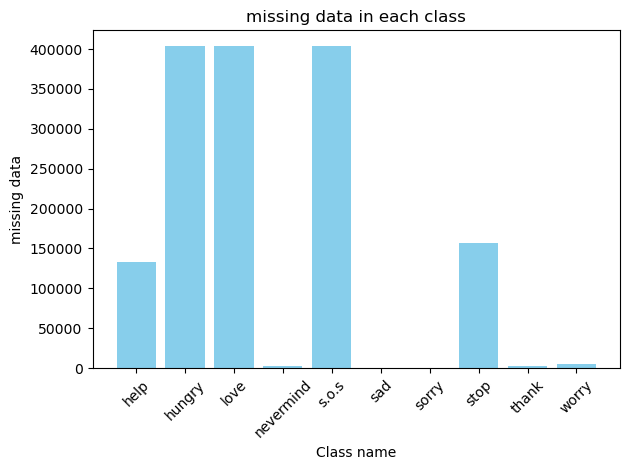

In [7]:
import matplotlib.pyplot as plt

# สร้างกราฟแท่ง
plt.bar(total_missing_values_per_class.index, total_missing_values_per_class.values, color='skyblue')

# เพิ่มหัวข้อแกน x และ y และหัวข้อกราฟ
plt.xlabel('Class name')
plt.ylabel('missing data')
plt.title('missing data in each class')

# แสดงกราฟ
plt.xticks(rotation=45)  # หมุนแกน x เพื่อให้ข้อความไม่ทับกัน
plt.tight_layout()  # ปรับระยะห่างของกราฟ
plt.show()


In [6]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [7]:
y

0        thank
1        thank
2        thank
3        thank
4        thank
         ...  
47994    worry
47995    worry
47996    worry
47997    worry
47998    worry
Name: class, Length: 47999, dtype: object

In [8]:
df.isnull().sum()

class        0
x1           0
y1           0
z1           0
v1           0
         ...  
v41      17991
x42      17991
y42      17991
z42      17991
v42      17991
Length: 169, dtype: int64

In [ ]:
df = df.fillna(0)

print(df)

In [ ]:
df = df.dropna(axis=1)
# ลบคอลัมน์ที่มีค่า null ใน DataFrame X
X = X.dropna(axis=1)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

In [10]:
print(X_test.shape)  # แสดงจำนวนคอลัมน์ใน X_test
print(X_train.shape)  # แสดงจำนวนคอลัมน์ใน X_train


(9600, 168)
(38399, 168)


In [12]:
y_test

22370         help
38156        s.o.s
19601         help
11384        sorry
3451         thank
           ...    
884          thank
6956           sad
29097    nevermind
13318        sorry
42277         stop
Name: class, Length: 9600, dtype: object

## 3.2 Train Machine Learning Classification Model

In [13]:
# สร้าง pipelines สำหรับโมเดลแบบคลาสิฟาย (Classifier) โดยใช้ scikit-learn (sklearn)
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
# import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# data = pd.read_csv('coords_new.csv') 

# X = data.drop(columns=['class'])  # เลือกคุณลักษณะทั้งหมดยกเว้นคอลัมน์ 'class'
# y = data['class']  # เลือกคอลัมน์ 'class' เป็นเป้าหมาย

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# X_train = X_train.fillna(X_train.mean())

# # สร้าง Neural Network
# model_nn = Sequential()
# model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model_nn.add(Dense(32, activation='relu'))
# model_nn.add(Dense(1, activation='sigmoid'))

# model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # ฝึกโมเดล Neural Network ด้วยข้อมูล X_train, y_train
# model_nn.fit(X_train, y_train, epochs=10, batch_size=32)

# # ทำนายผลบนชุดข้อมูลทดสอบ X_test
# yhat = model_nn.predict(X_test)
# yhat_binary = (yhat > 0.5)  # แปลงค่าความน่าจะเป็นให้เป็นคลาสที่หนึ่งหรือศูนย์

# # คำนวณความแม่นยำของโมเดล
# accuracy = accuracy_score(y_test, yhat_binary)
# print("Accuracy:", accuracy)

In [14]:
pipelines = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression()),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'dt': make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'nn': make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000))
}

In [15]:
pipelines.keys()

dict_keys(['lr', 'rf', 'gb', 'dt', 'nn'])

In [16]:
list(pipelines.values())

[Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier', MLPClassifier(max_iter=1000))])]

In [22]:
# ตรวจสอบข้อมูลใน X_train
missing_data_x = X_train.isnull().sum()
print("Missing data in X_train:\n", missing_data_x)

Missing data in X_train:
 x1     0
y1     0
z1     0
v1     0
x2     0
      ..
v41    0
x42    0
y42    0
z42    0
v42    0
Length: 168, dtype: int64


In [18]:
# ตรวจสอบข้อมูลใน y_train
missing_data_y = y_train.isnull().sum()
print("Missing data in y_train:\n", missing_data_y)

Missing data in y_train:
 0


In [21]:
X_test.isnull().sum()

x1     0
y1     0
z1     0
v1     0
x2     0
      ..
v41    0
x42    0
y42    0
z42    0
v42    0
Length: 168, dtype: int64

In [20]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
# เติมค่าเฉลี่ยในที่ข้อมูลที่หายไปของ X_train
X_train = X_train.fillna(X_train.mean())

In [ ]:
# เติมค่าเฉลี่ยในที่ข้อมูลที่หายไปของ X_test
X_test = X_test.fillna(X_test.mean())

In [ ]:
#ลบคอลัมน์ที่มีค่า null ออกจาก X_train
X_train = X_train.dropna(axis=1)

In [ ]:
#ลบคอลัมน์ที่มีค่า null ออกจาก X_train
X_test = X_test.dropna(axis=1)

In [ ]:
X_train.to_csv('coords_new_filled.csv')

In [ ]:
new_df = pd.read_csv('coords_new_filled.csv')
new_df

# ลองฝึกโมเดลแยกเอาเฉพาะ nn

In [ ]:
# สร้างโมเดล Neural Network
nn_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000))

# ฝึกโมเดลโดยใช้ข้อมูลการฝึก X_train, y_train
nn_model.fit(X_train, y_train)

# ทดสอบโมเดล
accuracy = nn_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# ลองใช้ Grid Search เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุดสำหรับโมเดล

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# สร้าง Pipeline ที่รวม StandardScaler และ MLPClassifier
nn_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000))

# กำหนดค่าของพารามิเตอร์ที่ต้องการทดลอง
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(100,), (150,)],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__alpha': [0.0001, 0.001],
}

# ใช้ Grid Search เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด cv=5 ซึ่งหมายถึงใช้ 5-fold cross-validation ในการประเมินผล 
# n_jobs=-1 หมายถึงการใช้ทรัพยากรที่พร้อมใช้งานทั้งหมดสำหรับการค้นหา ซึ่งจะช่วยลดเวลาในการประมวลผลโดยการใช้หลายๆ กระบวนการ
grid_search = GridSearchCV(nn_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_search.best_params_)

# ทดสอบโมเดลที่ปรับพารามิเตอร์แล้ว
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'mlpclassifier__activation': 'relu', 'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (150,), 'mlpclassifier__solver': 'adam'}
Accuracy: 0.9888541666666667


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# สร้าง Pipeline ที่รวม StandardScaler และ MLPClassifier
nn_model = make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000))

# กำหนดค่าของพารามิเตอร์ที่ต้องการทดลอง
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (150,), (200,),],
    'mlpclassifier__activation': ['relu'],
    'mlpclassifier__solver': ['adam'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
}

# ใช้ Grid Search เพื่อค้นหาค่าพารามิเตอร์ที่ดีที่สุด cv=5 ซึ่งหมายถึงใช้ 5-fold cross-validation ในการประเมินผล 
# n_jobs=-1 หมายถึงการใช้ทรัพยากรที่พร้อมใช้งานทั้งหมดสำหรับการค้นหา ซึ่งจะช่วยลดเวลาในการประมวลผลโดยการใช้หลายๆ กระบวนการ
grid_search = GridSearchCV(nn_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# แสดงค่าพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_search.best_params_)

# ทดสอบโมเดลที่ปรับพารามิเตอร์แล้ว
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# บันทึกโมเดลนั้นเพื่อใช้งานในภายหลัง

In [27]:
# import joblib

# # บันทึกโมเดลที่ปรับพารามิเตอร์แล้ว
# joblib.dump(best_model, 'best_nn_model_2.pkl')


['best_nn_model_2.pkl']

# ใช้โมเดลในการทำนายหรือประเมินผล

In [28]:
# โหลดโมเดลที่ถูกบันทึกไว้
loaded_model = joblib.load('best_nn_model_2.pkl')

# ใช้โมเดลในการทำนายหรือประเมินผล
accuracy = loaded_model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9888541666666667


# สร้างแต่ละ pipeline เพื่อฝึกทุกโมเดล

In [ ]:
fit_models = {} # สร้าง dictionary เพื่อเก็บโมเดลที่ถูกฝึก
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train) # ฝึกโมเดลโดยใช้ข้อมูลการฝึก X_train, y_train
    fit_models[algo] = model # เก็บโมเดลที่ฝึกไว้ใน fit_models โดยใช้ชื่อของแบบจำลอง (Classifier) เป็น key
    
    import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# # ตรวจสอบว่าข้อมูลมีเฉพาะมือขวาหรือไม่
# is_right_hand_only = X_train.filter(like='right_hand').notna().all(axis=1)

# # กรองข้อมูลที่มีเฉพาะมือขวา
# X_train_right_hand_only = X_train[is_right_hand_only]

# # กรองข้อมูลที่มีทั้งสองมือ
# X_train_both_hands = X_train[~is_right_hand_only]

# # เติมข้อมูลมือซ้ายใน X_train_both_hands ในกรณีที่ข้อมูลมือซ้ายไม่ครบ
# for i in range(21):
#     col_name = f'left_hand_{i}'
#     if col_name not in X_train.columns:
#         X_train_both_hands[col_name] = np.nan

# # เติมข้อมูลใน X_train_both_hands จาก X_train_right_hand_only
# X_train_both_hands.update(X_train_right_hand_only)

# fit_models = {}  # สร้าง dictionary เพื่อเก็บโมเดลที่ถูกฝึก
# for algo, pipeline in pipelines.items():
#     model = pipeline.fit(X_train_both_hands, y_train[~is_right_hand_only])  # ฝึกโมเดลโดยใช้ข้อมูลการฝึก X_train_both_hands, y_train
#     fit_models[algo] = model  # เก็บโมเดลที่ฝึกไว้ใน fit_models โดยใช้ชื่อของแบบจำลอง (Classifier) เป็น key

#     model = pipeline.fit(X_train_right_hand_only, y_train[is_right_hand_only])  # ฝึกโมเดลโดยใช้ข้อมูลการฝึก X_train_right_hand_only, y_train
#     fit_models[algo + '_right'] = model  # เก็บโมเดลที่ฝึกไว้ใน fit_models โดยใช้ชื่อของแบบจำลอง (Classifier) เป็น key

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
fit_models 
# loaded_model

In [ ]:
nan_check = X_test.isna().any()
print("Columns with NaN values:", nan_check[nan_check])

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

y_pred_lr = fit_models['nn'].predict(X_test)
y_pred_lr
#ผลลัพธ์ที่ได้จะเป็น array หรือรายการของค่าที่แทนคลาสหรือผลลัพธ์ที่โมเดลทำนายสำหรับข้อมูลใน X_test gช่น [0, 1, 1, 0, 1, ...] โดยแต่ละค่าจะแทนคลาสหรือผลลัพธ์ที่โมเดลทำนายสำหรับข้อมูลแต่ละตัวใน X_test

## 3.3 Evaluate and Serialize Model 

ประเมินและบันทึกโมเดลที่ถูกฝึก เพื่อให้สามารถนำไปใช้งาน

In [29]:
from sklearn.metrics import accuracy_score
import pickle 

# Best Model with Accuracy

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# ทดสอบและคำนวณความแม่นยำของแต่ละโมเดลที่ถูกฝึกขึ้นและเก็บไว้ใน fit_models
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
model_accuracies = {}

for algo, model in fit_models.items():
    yhat = model.predict(X_test)  # ใช้โมเดลเพื่อทำนายผลบนชุดข้อมูลทดสอบ X_test
    accuracy = accuracy_score(y_test, yhat)
    model_accuracies[algo] = accuracy
    print(f"{algo}: Accuracy = {accuracy:.2f}")  

# ค้นหาโมเดลที่มีความแม่นยำสูงสุด
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"Best Model: {best_model} with Accuracy = {best_accuracy:.2f}") 

# ก็บความแม่นยำของแต่ละโมเดล
model_names = list(fit_models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in fit_models.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues_d')  # ใช้ palette 'Blues_d' เพื่อกำหนดสีฟ้าและลำดับสีเข้มไปหาอ่อน
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)  
plt.ylim(0.8, 1.0)  # กำหนดช่วงค่า y ที่แสดงบนกราฟ
plt.show()

# Precision  Recall   F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
model_metrics = {}  # สร้าง dictionary เพื่อเก็บค่า(precision),  (recall), และ F1 Score
average_type = 'weighted'  # เลือกค่าเฉลี่ยที่เหมาะสม
for algo, model in fit_models.items():
    yhat = model.predict(X_test)  # ใช้โมเดลเพื่อทำนายผลบนชุดข้อมูลทดสอบ X_test
    precision = precision_score(y_test, yhat, average=average_type)
    recall = recall_score(y_test, yhat, average=average_type)
    f1 = f1_score(y_test, yhat, average=average_type)
    model_metrics[algo] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    print(f"{algo}: Precision = {precision:.2f}, Recall = {recall:.2f}, F1 Score = {f1:.2f}")

# ค้นหาโมเดลที่มีค่า Precision Recall F1 Score สูงสุด
best_f1_model = max(model_metrics, key=lambda x: model_metrics[x]['F1 Score'])
best_f1_score = model_metrics[best_f1_model]['F1 Score']

print(f"Best Model (F1 Score): {best_f1_model} with F1 Score = {best_f1_score:.2f}")

# Confusion Matrix เพื่อตรวจสอบการทำนายที่ถูกต้องและผิดของโมเดลในแต่ละคลาส

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# สร้าง subplot สำหรับแต่ละโมเดล
fig, axes = plt.subplots(nrows=1, ncols=len(fit_models), figsize=(16, 4))

for i, (algo, model) in enumerate(fit_models.items()):
    ax = axes[i]
    yhat = model.predict(X_test)  # ใช้โมเดลเพื่อทำนายผลบนชุดข้อมูลทดสอบ X_test
    cm = confusion_matrix(y_test, yhat)  # คำนวณ Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(algo)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Confusion Matrix โดยใช้โมเดลที่ดีที่สุด nn

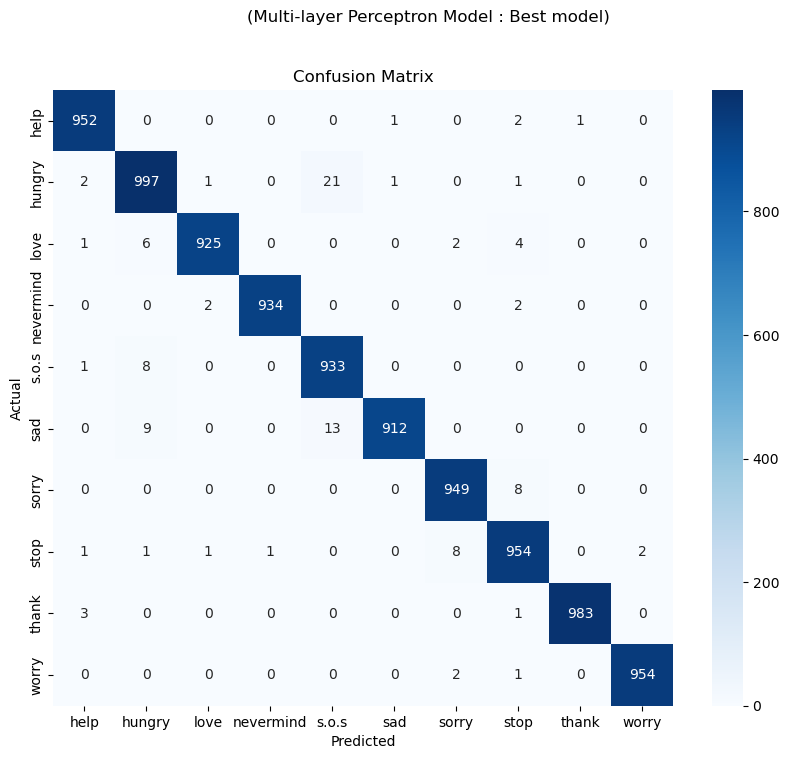

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดงผลลัพธ์ในรูปแบบของ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=loaded_model.classes_, yticklabels=loaded_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.suptitle('(Multi-layer Perceptron Model : Best model)')  # หัวเรื่องระดับสูง
plt.title('Confusion Matrix')  # หัวเรื่องระดับต่ำ

plt.show()

# เช็ค report classify สำหรับโมเดลที่ดีที่สุด

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

# ใช้โมเดลทำนายผลบนชุดข้อมูลทดสอบ X_test
y_pred = loaded_model.predict(X_test)

# แสดง classification report

print("Classification Report:")
print('(Multi-layer Perceptron Model : Best model)')
print(classification_report(y_test, y_pred))

Classification Report:
(Multi-layer Perceptron Model : Best model)
              precision    recall  f1-score   support

        help       0.99      1.00      0.99       956
      hungry       0.98      0.97      0.98      1023
        love       1.00      0.99      0.99       938
   nevermind       1.00      1.00      1.00       938
       s.o.s       0.96      0.99      0.98       942
         sad       1.00      0.98      0.99       934
       sorry       0.99      0.99      0.99       957
        stop       0.98      0.99      0.98       968
       thank       1.00      1.00      1.00       987
       worry       1.00      1.00      1.00       957

    accuracy                           0.99      9600
   macro avg       0.99      0.99      0.99      9600
weighted avg       0.99      0.99      0.99      9600



In [41]:
print("Classes in the model:")
print(model.classes_)


Classes in the model:


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# ดึงคำอธิบายของคลาสทั้งหมดจากโมเดล
class_names = model.classes_

# สร้าง subplot สำหรับแต่ละโมเดล
fig, axes = plt.subplots(nrows=1, ncols=len(fit_models), figsize=(16, 4))

for i, (algo, model) in enumerate(fit_models.items()):
    ax = axes[i]
    yhat = model.predict(X_test)  # ใช้โมเดลเพื่อทำนายผลบนชุดข้อมูลทดสอบ X_test
    cm = confusion_matrix(y_test, yhat)  # คำนวณ Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(algo)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

plt.tight_layout()
plt.show()


In [ ]:
# ใช้โมเดล ที่ถูกเทรนและเก็บไว้ใน fit_models เพื่อทำนายผลลัพธ์บนชุด X_test
fit_models['nn'].predict(X_test)

In [ ]:
y_test

In [ ]:
with open('Thai_Sign_Language_Term3.pkl', 'wb') as f:
    pickle.dump(fit_models['nn'], f) # บันทึกโมเดล ที่อยู่ในตัวแปร fit_models['lr'] ลงในไฟล์ 

# 4. Make Detections with Model

In [ ]:
with open('best_nn_model.pkl', 'rb') as f: # เปิดไฟล์ 'body_language.pkl' (read binary) เพื่อเตรียมโมเดลที่จะถูกโหลดเข้ามา
    model = pickle.load(f) # โหลดโมเดล RandomForestClassifier จากไฟล์ 'body_language.pkl' และเก็บโมเดลในตัวแปร model.

In [ ]:
model

In [ ]:
# cap = cv2.VideoCapture(0)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image.flags.writeable = False        
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
#         # 1. Draw face landmarks
#         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                                  )
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
#         # Export coordinates
#         try:
#             # Extract Pose landmarks
#             pose = results.pose_landmarks.landmark
#             pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
#             # Extract Face landmarks
#             face = results.face_landmarks.landmark
#             face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
#             # Concate rows
#             row = pose_row+face_row
            
# #             # Append class name 
# #             row.insert(0, class_name)
            
# #             # Export to CSV
# #             with open('coords.csv', mode='a', newline='') as f:
# #                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
# #                 csv_writer.writerow(row) 

#             # Make Detections
#             X = pd.DataFrame([row])
#             body_language_class = model.predict(X)[0]
#             body_language_prob = model.predict_proba(X)[0]
#             print(body_language_class, body_language_prob)
            
#             # Grab ear coords
#             coords = tuple(np.multiply(
#                             np.array(
#                                 (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
#                                  results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
#                         , [640,480]).astype(int))
            
#             cv2.rectangle(image, 
#                           (coords[0], coords[1]+5), 
#                           (coords[0]+len(body_language_class)*20, coords[1]-30), 
#                           (245, 117, 16), -1)
#             cv2.putText(image, body_language_class, coords, 
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
#             # Get status box
            
#             # Display Class
#             cv2.putText(image, 'CLASS'
#                         , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
#             cv2.putText(image, body_language_class.split(' ')[0]
#                         , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
#             # Display Probability
#             cv2.putText(image, 'PROB'
#                         , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
#             cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
#                         , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
#         except:
#             pass
                        
#         cv2.imshow('Raw Webcam Feed', image)

#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

# ใช้งานได้ดีมาก

In [1]:
import mediapipe as mp
import cv2
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# นำเข้าโมดูลและไลบรารีที่ต้องใช้
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# สร้างตัวแปรเพื่อเก็บ landmark ของมือซ้ายและมือขวา
left_hand_landmarks = None
right_hand_landmarks = None

# โหลดโมเดลที่ถูกบันทึกไว้ในไฟล์และเตรียมโมเดลสำหรับการทำนายภาษากาย
with open('Thai_Sign_Language_Term2.pkl', 'rb') as f:
    model = pickle.load(f)

# เปิดกล้องเว็บแคม
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # แปลงภาพเฟรมเป็นรูปแบบสี RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # ทำการตรวจจับพิกัด (landmarks) สำหรับการตรวจจับท่าทาง (Pose)
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results_pose = pose.process(image)

    # ทำการตรวจจับพิกัด (landmarks) สำหรับมือ (Hands)
    with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:
        results_hands = hands.process(image)

    # ทำการตรวจจับใบหน้า (Face Detection)
    #with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
        #results_face_detection = face_detection.process(image)

    # ทำการตรวจจับพิกัด (landmarks) สำหรับใบหน้า (Face Mesh)
    #with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
        #results_face_mesh = face_mesh.process(image)

    # แปลงภาพกลับเป็นรูปแบบ BGR เพื่อแสดงผล
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # วาดพิกัด (landmarks) สำหรับท่าทาง (Pose)
    mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

    # วาดพิกัด (landmarks) สำหรับมือ (Hands)
    if results_hands.multi_hand_landmarks:
        for hand_landmarks in results_hands.multi_hand_landmarks:
            if hand_landmarks == results_hands.multi_hand_landmarks[0]:
                left_hand_landmarks = hand_landmarks
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
            elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
                right_hand_landmarks = hand_landmarks
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

    # วาดผลลัพธ์การตรวจจับใบหน้า (Face Detection)
    #if results_face_detection.detections:
        #for detection in results_face_detection.detections:
            #mp_drawing.draw_detection(image, detection)

    # วาดพิกัด (landmarks) สำหรับใบหน้า (Face Mesh)
    #if results_face_mesh.multi_face_landmarks:
        #for face_landmarks in results_face_mesh.multi_face_landmarks:
            #mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                     #mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                     #mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

    # แสดงภาพ
    cv2.imshow('Webcam Feed with Landmarks', image)

    # ทำการทำนายภาษากายโดยใช้โมเดลที่โหลดมา
    try:
        # แยกพิกัดสำหรับท่าทาง (Pose landmarks)
        pose_landmarks = results_pose.pose_landmarks
        if pose_landmarks:
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks.landmark]).flatten())
        else:
            pose_row = []

        # แยกพิกัดสำหรับใบหน้า (Face landmarks)
        face_landmarks = results_face_mesh.multi_face_landmarks[0] if results_face_mesh.multi_face_landmarks else None
        if face_landmarks:
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face_landmarks.landmark]).flatten())
        else:
            face_row = []

        # แยกพิกัดสำหรับมือซ้าย (Left Hand landmarks)
        left_hand_landmarks = results_hands.multi_hand_landmarks[0] if results_hands.multi_hand_landmarks else None
        if left_hand_landmarks:
            left_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand_landmarks.landmark]).flatten())
        else:
            left_hand_row = []

        # แยกพิกัดสำหรับมือขวา (Right Hand landmarks)
        right_hand_landmarks = results_hands.multi_hand_landmarks[1] if len(results_hands.multi_hand_landmarks) > 1 else None
        if right_hand_landmarks:
            right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks.landmark]).flatten())
        else:
            right_hand_row = []

        # รวมพิกัดทั้งหมดเข้าด้วยกัน
        row =  left_hand_row  # + face_row  pose_row pose_row +

        # ทำการทำนายภาษากายโดยใช้โมเดลที่โหลดมา
        X = pd.DataFrame([row])
        body_language_class = model.predict(X)[0]
        body_language_prob = model.predict_proba(X)[0]

        # แสดงผลลัพธ์การทำนาย
        coords = tuple(np.multiply(
            np.array(
                (results_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].x, 
                 results_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].y))
            , [640, 480]).astype(int))
        
        cv2.rectangle(image, 
                      (coords[0], coords[1] + 5), 
                      (coords[0] + len(body_language_class) * 20, coords[1] - 30), 
                      (245, 117, 16), -1)
        cv2.putText(image, body_language_class, coords, 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # แสดงกล่องสถานะ
        cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)
        
        # แสดงชื่อคลาส
        cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, body_language_class.split(' ')[0], (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # แสดงความน่าจะเป็น
        cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    except:
        pass

    # แสดงภาพกลับพร้อมพิกัดและการทำนาย
    cv2.imshow('Webcam Feed with Landmarks', image)

    # กด 'q' เพื่อออกจากโปรแกรม
    if cv2.waitKey(3) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\asus\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [11]:
# tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
# results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))

# test1

In [ ]:
import mediapipe as mp
import cv2
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# นำเข้าโมดูลและไลบรารีที่ต้องใช้
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# สร้างตัวแปรเพื่อเก็บ landmark ของมือซ้ายและมือขวา
left_hand_landmarks = None
right_hand_landmarks = None

# โหลดโมเดลที่ถูกบันทึกไว้ในไฟล์และเตรียมโมเดลสำหรับการทำนายภาษากาย
with open('best_nn_model.pkl', 'rb') as f:
    model = pickle.load(f)

# เปิดกล้องเว็บแคม
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # แปลงภาพเฟรมเป็นรูปแบบสี RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # ทำการตรวจจับพิกัด (landmarks) สำหรับการตรวจจับท่าทาง (Pose)
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results_pose = pose.process(image)

    # ทำการตรวจจับพิกัด (landmarks) สำหรับมือ (Hands)
    with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:
        results_hands = hands.process(image)

    # ทำการตรวจจับใบหน้า (Face Detection)
    #with mp_face_detection.FaceDetection(min_detection_confidence=0.5) as face_detection:
        #results_face_detection = face_detection.process(image)

    # ทำการตรวจจับพิกัด (landmarks) สำหรับใบหน้า (Face Mesh)
    #with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
        #results_face_mesh = face_mesh.process(image)

    # แปลงภาพกลับเป็นรูปแบบ BGR เพื่อแสดงผล
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # วาดพิกัด (landmarks) สำหรับท่าทาง (Pose)
    mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

    # วาดพิกัด (landmarks) สำหรับมือ (Hands)
    if results_hands.multi_hand_landmarks:
        for hand_landmarks in results_hands.multi_hand_landmarks:
            if hand_landmarks == results_hands.multi_hand_landmarks[0]:
                left_hand_landmarks = hand_landmarks
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))
            elif hand_landmarks == results_hands.multi_hand_landmarks[1]:
                right_hand_landmarks = hand_landmarks
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

    # วาดผลลัพธ์การตรวจจับใบหน้า (Face Detection)
    #if results_face_detection.detections:
        #for detection in results_face_detection.detections:
            #mp_drawing.draw_detection(image, detection)

    # วาดพิกัด (landmarks) สำหรับใบหน้า (Face Mesh)
    #if results_face_mesh.multi_face_landmarks:
        #for face_landmarks in results_face_mesh.multi_face_landmarks:
            #mp_drawing.draw_landmarks(image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                     #mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                     #mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

    # แสดงภาพ
    cv2.imshow('Webcam Feed with Landmarks', image)

    # ทำการทำนายภาษากายโดยใช้โมเดลที่โหลดมา
# ทำการทำนายภาษากายโดยใช้โมเดลที่โหลดมา
    try:
        # ตรวจสอบว่ามีมือขวาและมือซ้ายอยู่ในเฟรมหรือไม่
        if right_hand_landmarks and left_hand_landmarks:
            # ถ้ามีทั้งสองมืออยู่ในเฟรม ให้ใช้ทั้งสองมือ
            right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks.landmark]).flatten())
            left_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand_landmarks.landmark]).flatten())
            row = right_hand_row + left_hand_row
        elif right_hand_landmarks:
            # ถ้ามีแค่มือขวาอยู่ในเฟรม ให้ใช้มือขวา
            row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks.landmark]).flatten())
        else:
            # ถ้ามีแค่มือซ้ายหรือไม่มีมืออยู่ในเฟรม ให้ข้ามการทำนาย
            raise ValueError("No valid hand landmarks found")

        # ทำการทำนายภาษากายโดยใช้โมเดลที่โหลดมา
        X = pd.DataFrame([row])
        body_language_class = model.predict(X)[0]
        body_language_prob = model.predict_proba(X)[0]

        # แสดงผลลัพธ์การทำนาย
        coords = tuple(np.multiply(
            np.array(
                (results_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].x,
                 results_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].y))
            , [640, 480]).astype(int))

        cv2.rectangle(image,
                      (coords[0], coords[1] + 5),
                      (coords[0] + len(body_language_class) * 20, coords[1] - 30),
                      (245, 117, 16), -1)
        cv2.putText(image, body_language_class, coords,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # แสดงกล่องสถานะ
        cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)

        # แสดงชื่อคลาส
        cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, body_language_class.split(' ')[0], (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # แสดงความน่าจะเป็น
        cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    except ValueError as ve:
        print(ve)
    except:
        pass


    # แสดงภาพกลับพร้อมพิกัดและการทำนาย
    cv2.imshow('Webcam Feed with Landmarks', image)

    # กด 'q' เพื่อออกจากโปรแกรม
    if cv2.waitKey(3) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# test1

In [ ]:
import mediapipe as mp
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# นำเข้าโมดูลและไลบรารีที่ต้องใช้
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# สร้างตัวแปรเพื่อเก็บ landmark ของมือขวา
right_hand_landmarks = None

# โหลดโมเดลที่ถูกบันทึกไว้ในไฟล์และเตรียมโมเดลสำหรับการทำนายภาษากาย
with open('best_nn_model.pkl', 'rb') as f:
    model = pickle.load(f)

# เปิดกล้องเว็บแคม
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    # แปลงภาพเฟรมเป็นรูปแบบสี RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    # ทำการตรวจจับพิกัด (landmarks) สำหรับท่าทาง (Pose)
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results_pose = pose.process(image)

    # ทำการตรวจจับพิกัด (landmarks) สำหรับมือ (Hands)
    with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.6) as hands:
        results_hands = hands.process(image)

    # แปลงภาพกลับเป็นรูปแบบ BGR เพื่อแสดงผล
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # วาดพิกัด (landmarks) สำหรับท่าทาง (Pose)
    mp_drawing.draw_landmarks(image, results_pose.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

    # วาดพิกัด (landmarks) สำหรับมือ (Hands)
    if results_hands.multi_hand_landmarks:
        for hand_landmarks in results_hands.multi_hand_landmarks:
            if hand_landmarks == results_hands.multi_hand_landmarks[1]:  # เปลี่ยนจาก [0] เป็น [1] เพื่อให้ใช้มือขวา
                right_hand_landmarks = hand_landmarks
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

    # ทำการทำนายภาษากายโดยใช้โมเดลที่โหลดมา
    try:
        # แยกพิกัดสำหรับมือขวา (Right Hand landmarks) เท่านั้น
        right_hand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks.landmark]).flatten()) if right_hand_landmarks else []

        # รวมพิกัดทั้งหมดเข้าด้วยกัน (ใช้ข้อมูลจากมือขวาเท่านั้น)
        row = right_hand_row

        # ทำการทำนายภาษากายโดยใช้โมเดลที่โหลดมา
        X = pd.DataFrame([row])
        body_language_class = model.predict(X)[0]
        body_language_prob = model.predict_proba(X)[0]

        # แสดงผลลัพธ์การทำนาย
        coords = tuple(np.multiply(
            np.array(
                (results_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].x, 
                 results_pose.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EAR].y))
            , [640, 480]).astype(int))
        
        cv2.rectangle(image, 
                      (coords[0], coords[1] + 5), 
                      (coords[0] + len(body_language_class) * 20, coords[1] - 30), 
                      (245, 117, 16), -1)
        cv2.putText(image, body_language_class, coords, 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # แสดงกล่องสถานะ
        cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)
        
        # แสดงชื่อคลาส
        cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, body_language_class.split(' ')[0], (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # แสดงความน่าจะเป็น
        cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    except:
        pass

    # แสดงภาพกลับพร้อมพิกัดและการทำนาย
    cv2.imshow('Webcam Feed with Landmarks', image)

    # กด 'q' เพื่อออกจากโปรแกรม
        # กด 'q' เพื่อออกจากโปรแกรม
    if cv2.waitKey(3) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
